# Benchmarking

We want to investigate the strong scaling of our simulation. This means that the **total** workload is fixed and the number of processes used to run the simulation varies. This means we must keep our FDS file fixed for all different test runs exept for the mesh lines.  
Remember the line:

generates a mesh from x = 0 to x = 4.2 m, y = 0 to y = 2.4 m and z = 0 to z = 12.24 m. Here we have 42 cells in x, 24 in y and 122 cells in z direction. We could split this mesh in several different meshes. <br>
**IMPORTANT:** The number of meshes must fit to the number of tasks in the submit.sh script, otherwise slurm will not understand how to select the correct number of processes. <br>
For example we could have 2 meshes, a bottom mesh and a top mesh where we have only have the number of cells in z direction:

To avoid writing all the mesh lines by hand you can use e.g. a python script to split the "&MESH ID='1'" line according to your disires.  

Finally, let's get started with the benchmarking. 
We first need a directory for our simulation and submission files. We will call it "benchmark" and save the first FDS-Code here. <br>
You can use this as default [staircase benchmark](../../../../data/fds_tutorial/benchmark_tutorial/staircase_fire_ox_VF.fds)

We want to change the number of processes and therefore we need to change the number of meshes for each simulation. <br>
Lets split this example into 2, 4, 8, and 16 meshes. 

| Processes | No. of cells in x | No. of cells in y | No. of cells in z
| :-: | :-: | :-: | :-: |
| 1 | 42 | 24 | 120
| 2 | 42 | 24 | 60
| 4 | 42 | 24 | 30
| 8 | 21 | 24 | 30
| 16 | 21 | 24 | 15

We also need 5 submit scripts where we specify the required resources and run the job. Once we have the 5 submit scripts and the 5 FDS codes we can start the simulation with:

Each simulation will run as usual but we are more interested in the execution details than on the simulation results. We now take a closer look on the file <font color=blue> *CHID*_cpu.csv </font>. In here there are a lot of information. For each process there will be a row with details on *RANK*, *MAIN*, *DIVG*, *MASS*, *VELO*, *PRES* and much more. <br>
These abbreviation represent the compontents which FDS executes during runtime. For example MASS is the routine which handles the computation of the masses, VELO computes the velocities, DUMP is the output routine where data is written to files (and so on...). For more details check the FDS User manual. <br>
Important to note is that the *MAIN* routine is basically a idle routine where processes which are already done with their part of the computation wait for processes which are not yet ready. Therefore this should be a very small fraction of the *total T_USED* otherwise you can see that the work is not well balanced among the processes.

Once a simulation is done you can rename the CHID_cpu.csv file to a name you can use in a python evaluation code later (e.g. 1.cpu, 2.cpu, 4.cpu, 8.cpu and 16.cpu). Having the 5 cpu files collected we can start the evaluation.### Benchmarking
We want to investigate the strong scaling of our simulation. This means that the **total** workload is fixed and the number of processes used to run the simulation varies. This means we must keep our FDS file fixed for all different test runs exept for the mesh lines.  
Remember the line:

### Evaluation using Python
For the evaluation we will use matplotlib in python. We choose <font color=green>**plt**</font> as the Keyword to refer to <font color=green>**pyplot**</font>.

In [26]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import numpy as np

<font color=green> **\_color_data** </font> will be used to have access to more different colors when plotting the data. <br>
<font color=green> **numpy** </font> is used for mathematical operations such as finding the max/min, calculating the average, and so on.

In [27]:
RANK = []
MAIN = []
DIVG = []
MASS = []
VELO = []
PRES = []
WALL = []
DUMP = []
PART = []
RADI = []
FIRE = []
COMM = []
EVAC = []
HVAC = []
GEOM = []
VEGE = []
T_USED = []

Here we initialize the lists where we store the data for each simulation run.

In [28]:
#generate a list with the numbers of processes from our simulation 
#from those we will read in the cpu-files
files = [1, 2, 4, 8, 16] 

for i in files:
    
    #initialize empty 17 list-dummies (temporal storage)
    my_values = [0]*17 
    
    #open the file with names "1.cpu", ..., "16.cpu"
    fileHandle = open("../../../../data/fds_tutorial/benchmark_tutorial/cpu_files/" + str(i) +'.cpu',"r")
    
    #read the file and store the lines in a list called lineList
    lineList = fileHandle.readlines()
    
    #you need to close the files once you don't need them anymore
    fileHandle.close()
    
    #our first line in the file contained the names for the channels.
    #we dont need this line in our linelist for evaluation
    lineList.pop(0)
    
    #iterate over the lines
    for line in lineList:
        #iterate over the elements in each line
        for j in range(len(my_values)):
            #add the channel - values for each process
            #e.g. Numbers in MAIN channel will be summed up for process 1 (up) to 16
            my_values[j] += float(line.split(",")[j])

            
            
    #divide each sum by the number of processes
    #now we calculated an average value  [sum(x)*1/n]
    for j in range(len(my_values)):
        my_values[j] = my_values[j]/len(lineList)

        
    #store the calculated averages in the lists for each channel
    RANK.append(my_values[0])
        #contains the number of processes
        
    MAIN.append(my_values[1])
    DIVG.append(my_values[2]) 
    MASS.append(my_values[3])
    VELO.append(my_values[4])
    PRES.append(my_values[5])
    WALL.append(my_values[6])
    DUMP.append(my_values[7])
    PART.append(my_values[8])
    RADI.append(my_values[9])
    FIRE.append(my_values[10])
    COMM.append(my_values[11])
    EVAC.append(my_values[12])
    HVAC.append(my_values[13])
    GEOM.append(my_values[14])
    VEGE.append(my_values[15])
    T_USED.append(my_values[16])

Now we have for each simulation an average value for each channel in the corresponding list. We can proceed with plotting now. <br>
First we initialize the figue window:

In [29]:
f = plt.figure()

<Figure size 432x288 with 0 Axes>

Next, we plot our data on a doubled logarithmic scale. We use the additional colors to distinguish the channels and we also set the labels. Doing so, the legend will be display the colors and names correctly.

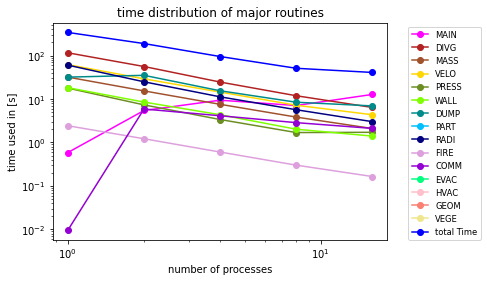

In [32]:
plt.loglog(files, MAIN, marker= 'o', color='fuchsia', label="MAIN")
plt.loglog(files, DIVG, marker= 'o', color='firebrick', label="DIVG")
plt.loglog(files, MASS, marker= 'o', color='sienna', label="MASS")
plt.loglog(files, VELO, marker= 'o', color='gold', label="VELO")
plt.loglog(files, PRES, marker= 'o', color='olivedrab', label="PRESS")
plt.loglog(files, WALL, marker= 'o', color='chartreuse', label="WALL")
plt.loglog(files, DUMP, marker= 'o', color='darkcyan', label="DUMP")
plt.loglog(files, PART, marker= 'o', color='deepskyblue', label="PART")
plt.loglog(files, RADI, marker= 'o', color='navy', label="RADI")
plt.loglog(files, FIRE, marker= 'o', color='plum', label="FIRE")
plt.loglog(files, COMM, marker= 'o', color='darkviolet', label="COMM")
plt.loglog(files, EVAC, marker= 'o', color='springgreen', label="EVAC")
plt.loglog(files, HVAC, marker= 'o', color='pink', label="HVAC")
plt.loglog(files, GEOM, marker= 'o', color='salmon', label="GEOM")
plt.loglog(files, VEGE, marker= 'o', color='khaki', label="VEGE")
plt.loglog(files, T_USED, marker= 'o', color='blue', label="total Time")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.ylabel('time used in [s]')
plt.xlabel('number of processes')
plt.title('time distribution of major routines')
f.savefig("scaling_log.pdf", bbox_inches='tight')

We add a legend right next to the plot and set the x- and y-labels as well as the title. The last step is to save the plot as a pdf vector graphic so that the plot does not get blurry once we use it in a paper or presentation.